CNV on high coverage Mopti and Cyp1 genomes
7/7/16

brad's files= /home/bradmain/gambiae/ASE/genomes
paper = http://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-015-2080-5
google doc = https://drive.google.com/drive/u/0/folders/0B3zjeZIUKtOebE9ZWWVSdHhCQ3c
blog = http://avrilomics.blogspot.com/2013/01/using-cnvnator-to-find-copy-number.html

1. Low quality reads removed: mpileup
2. Mapping reads to reference genome:
3. Removal of PCR duplicates : 
4. Realignment around indels: gntk
5. CNVnator at 100:

In [ ]:
#ln -s /path/to/file /path/to/symlink
/home/travc/bin/run_cnvnator.sh -root MOPTI_cyp1.root2 -tree CMR4MOPTIA0001_realigned.bam CVGLCYP1A0001_realigned.bam   # pre-processing step to pull the reads out of the bam file
/home/travc/bin/run_cnvnator.sh -root MOPTI_cyp1.root2 -his 100 -d colony_CNV/   #histogram bin size 100
/home/travc/bin/run_cnvnator.sh -root MOPTI_cyp1.root2 -stat 100                #statistics(pval)  bin size 100
/home/travc/bin/run_cnvnator.sh -root MOPTI_cyp1.root2 -partition 100           #partitions the chromosomes/scaffolds into long regions bin size 100
/home/travc/bin/run_cnvnator.sh -root MOPTI_cyp1.root2 -call 100 > 100_cnv.ouput                #finds potential CNVs bin size 100

##returns 7090 whereas with 50 bins returned 12781

6. Pindel to detect medium to large structural variations "they did(anchor was set to 20 (parameter “A”) and the maximum size of SV to be detected was set to 32,628 bp (parameter “x”))"

In [ ]:
samtools faidx Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa
./pindel -f ../Anopheles-gambiae-PEST_CHROMOSOMES_AgamP4.fa -i ../bam_files.txt -o mopti_cyp1.pindel

#Where bam_files.txt contains: (file, insert size, sample name) 
#/home/bradmain/gambiae/ASE/genomes/CVGLCYP1A0001_realigned.bam  250     CVG
#/home/bradmain/gambiae/ASE/genomes/CMR4MOPTIA0001_realigned.bam 250     CMR

#-required a minimum of 5 uniquely mapped reads supporting the variation
#-variations on random contigs and unlocalized chromosomes were excluded from the analysis

7. stringent filtering for raw CNV results

In [ ]:
#a. keep P < 0.01  # column 5 is: e-val1 -- is calculated using t-test statistics
awk '$5 < 0.01 {print}' 100_cnv.output > 100_cnv.output.filter1 #kep 6428 out of 7090

#b. keep size >= 1kb #
python size_filter.py  # kept 6034 out of 6428

#c. discard CNVs located on random contigs (chrN_random), unlocalized chromosomes (chrUn)
less 100_cnv.output.filter2 |head -3855 # 1 unknown
less 100_cnv.output.filter2 |head -3854 > 100_cnv.output.filter3   #kept 3854 out of 6034

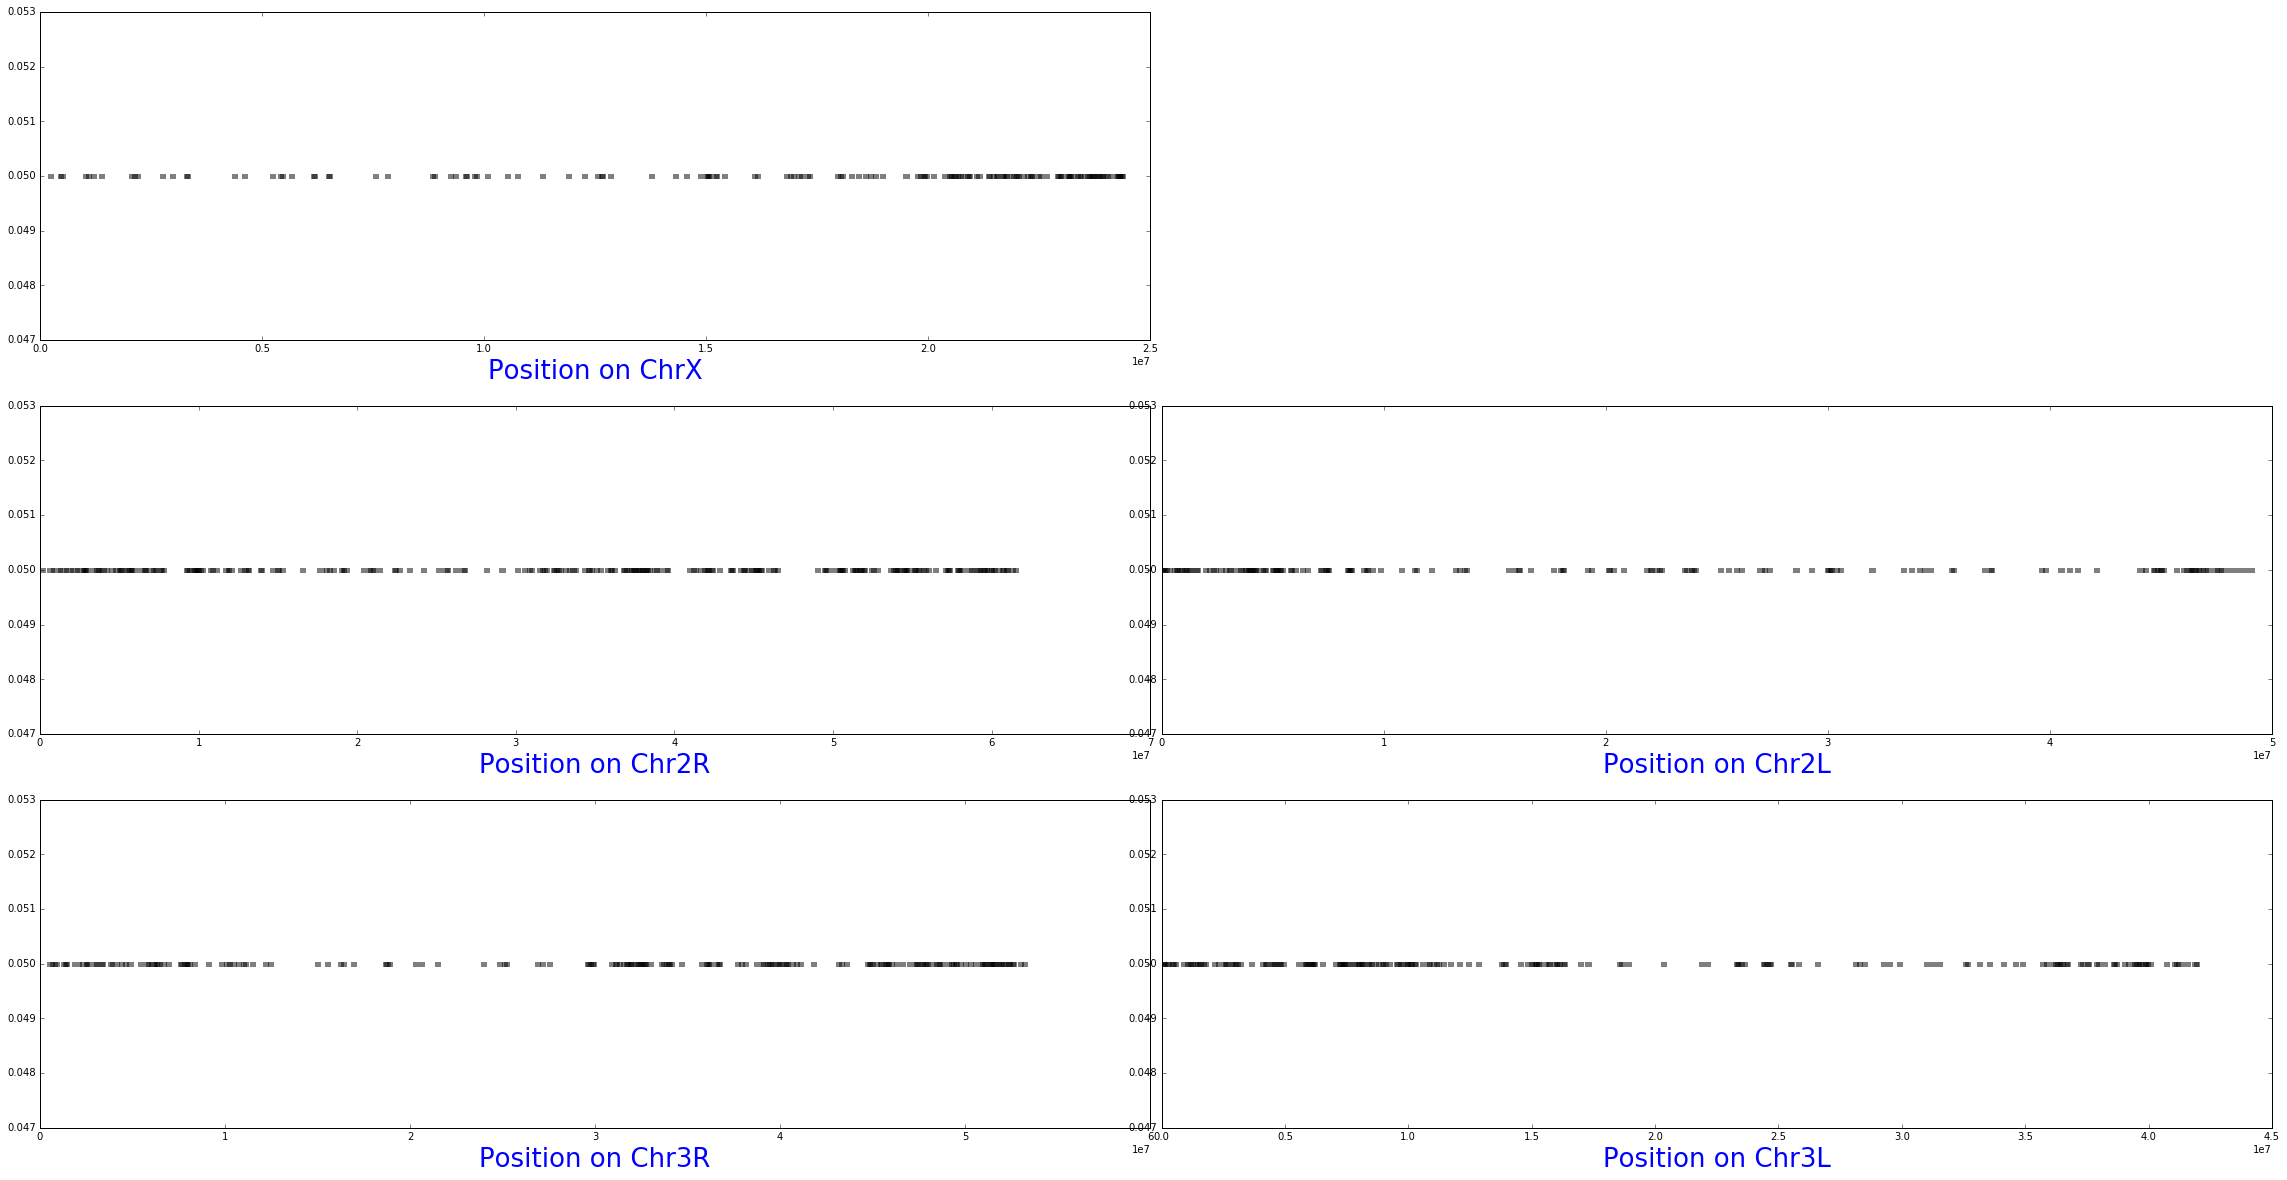

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (40.0, 20.0)

cwd= '/home/everitt/CNV'
filename= '100_cnv.output.filter3'

fig, axes = plt.subplots(ncols=2,nrows=3)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                   wspace=.01, hspace=None)
((chrX,N), (chr2R, chr2L), (chr3R, chr3L)) = axes
N.axis('off')

for line in open("{}/{}".format(cwd,filename)):
        i=line.strip().split()
        break_col= i[1].split(':')
        coordinates= break_col[1].split('-')
        #print coordinates
        #print break_col[0]
        if break_col[0]=='chr2L':
                outer=[coordinates[0],coordinates[1]]
                chr2L.plot(outer,[0.05,0.05],'k-',linewidth=5,alpha=0.5)
        elif break_col[0]=='chr2R':
                outer=[coordinates[0],coordinates[1]]
                chr2R.plot(outer,[0.05,0.05],'k-',linewidth=5,alpha=0.5)
        elif break_col[0]=='chr3R':
                outer=[coordinates[0],coordinates[1]]
                chr3R.plot(outer,[0.05,0.05],'k-',linewidth=5,alpha=0.5)
        elif break_col[0]=='chr3L':
                outer=[coordinates[0],coordinates[1]]
                chr3L.plot(outer,[0.05,0.05],'k-',linewidth=5,alpha=0.5)
        elif break_col[0]=='chrX':
                outer=[coordinates[0],coordinates[1]]
                chrX.plot(outer,[0.05,0.05],'k-',linewidth=5,alpha=0.5)
        else:
                print ('exception:', i[0]) 

chrX.set_xlabel("Position on ChrX",color='b',fontsize=26)
chr2R.set_xlabel("Position on Chr2R",color='b',fontsize=26)
chr2L.set_xlabel("Position on Chr2L",color='b',fontsize=26)
chr3R.set_xlabel("Position on Chr3R",color='b',fontsize=26)
chr3L.set_xlabel("Position on Chr3L",color='b',fontsize=26)
plt.show()

In [ ]:
NEXT:
import matplotlib_venn as V
V.venn3([M, CYP, both], ('M', 'cyp', 'both’))

how many indels are shared and unique?

NEXT: GC content- are they regions that don't matter
compared to whole genome
Need to pull out sequence that aligns with that region